In [102]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

sns.set_theme(style="ticks", context="notebook")
plt.style.use("dark_background")

import sustainabilitygame as sg


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
# Population properties
N = 100  # population size

# Game properties
R = 100  # number of rounds

# Agent properties
p_action_sus = {"sustainable": 0.8, "exploit": 0.2, "restore": 0.}
p_action_nonsus = {"sustainable": 0.2, "exploit": 0.8, "restore": 0.}

# Environment properties
reward_factors = {"sustainable": 0.01, "exploit": 0.05, "restore": 0}
impact_factors = {"sustainable": 1.0, "exploit": 0.999, "restore": 1.01}

# Simulate game for populations that differ in the ratio of sustainable vs. unsustainable agents
populations = []
p_sus_levels = np.arange(0, 1, 0.05)
for p_sus in tqdm(p_sus_levels):
    label = f"p_sus={p_sus:.2f}"
    environment = sg.Environment(
        label=label, reward_factors=reward_factors, impact_factors=impact_factors
    )
    agents = []
    agents.extend(
        [sg.Agent(id=f"s_{i}", p_action=p_action_sus) for i in range(int(N * p_sus))]
    )
    agents.extend(
        [
            sg.Agent(id=f"u_{i}", p_action=p_action_nonsus)
            for i in range(int(N * p_sus), N)
        ]
    )
    population = sg.Population(agents=agents, label=label, environment=environment)
    population.p_sus = p_sus
    for r in range(R):
        population.progress()
    populations.append(population)


  0%|          | 0/20 [00:00<?, ?it/s]

## Plotting

In [142]:
cmap = sns.color_palette("crest", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap)


Text(0.5, 1.0, '$p_{sus}$')

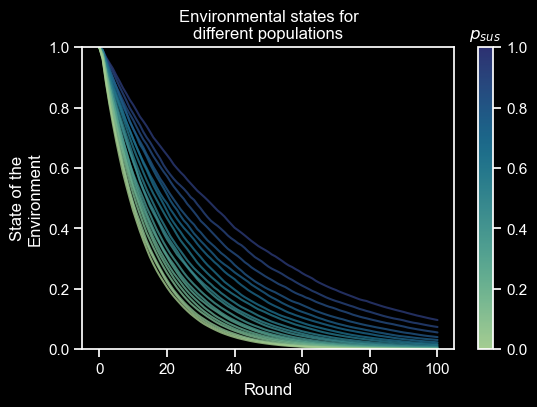

In [143]:
# Plot the environmental state histories
fig, ax = plt.subplots(dpi=100)
for population in populations[::-1]:
    ax.plot(
        [1]
        + [
            np.mean(population.environment.state_history[r * N : ((r + 1) * N - 1)])
            for r in range(R)
        ],  # For each round, compute mean across participants' actions
        color=cmap(population.p_sus),
        alpha=0.8,
    )

# Labels
ax.set_ylabel("State of the\nEnvironment")
ax.set_xlabel("Round")
ax.set_title("Environmental states for\ndifferent populations")


# Limits
ax.set_ylim(0, 1)

# Add a colorbar
clb = fig.colorbar(mappable=sm)
clb.ax.set_title(r"$p_{sus}$")


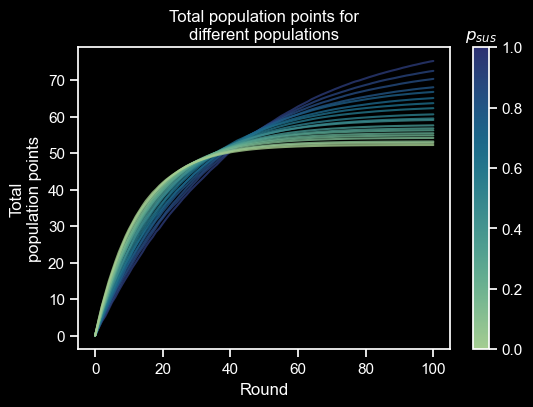

In [144]:
# Plot the population points histories
fig, ax = plt.subplots(dpi=100)
for population in populations[::-1]:
    ax.plot(population.total_points_history, color=cmap(population.p_sus), alpha=0.8)

# Labels
ax.set_ylabel("Total\npopulation points")
ax.set_xlabel("Round")
ax.set_title("Total population points for\ndifferent populations")

# Add a colorbar
clb = fig.colorbar(mappable=sm)
clb.ax.set_title(r"$p_{sus}$");